# <font color='orange'>DIP Exercise 03</font>

In [1]:
# Force CPU usage
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from scipy.ndimage import convolve

# Set random seed for reproducibility
np.random.seed(3)

The concept of artificial neural networks was already published several decades ago. But only due to improvements
of computational power and the availability of large data sets within the last decade, we were able to start using the potential power of neural networks.

The simplest form of a neural network is the so-called perceptron. Multiple inputs are weighted ($w_i$), summed and a bias ($b$) is added to produce the final output. This general principle holds for all neural networks discussed in this course.
<img src="perceptron.png" alt="Drawing" style="width: 200px;"/>

<img src='question_sign.png' width=20px height=20px style="float:left;"> We want to build a perceptron to simulate a logical AND of two binary input values $x_{0}$ and $x_{1}$. The output neuron's activation function is a step function with
$f_{step}(y)=
\begin{cases}
1, \quad y\geq0\\
0, \quad y\lt0
\end{cases}$. Determine the values for $w_{0}$ and $w_{1}$ and $b$.<br>

<img src="table_AND.png" alt="Drawing" style="width: 200px;"/>

> 

<img src='question_sign.png' width=20px height=20px style="float:left;"> Determine the values for $w_{0}$, $w_{1}$ and $b$ for solving a logical OR for the same setup.<br>

<img src="table_OR.png" alt="Drawing" style="width: 200px;"/>

> 

Multiple of these perceptrons can be stacked and connected in order to obtain a more complex network structure with higher capacity, called _Multilayer Perceptron_. This allows us to solve more complex tasks, but on the other hand it comes with a tradeoff between capacity and the number of parameters, which have to be trained.

<img src='question_sign.png' width=20px height=20px style="float:left;"> Calculate the number of trainable parameters for the following multilayer perceptron.<br>

<img src='MLP.png' width=649px height=318px style="float:left;"><br>

>

With such a multilayer perceptron we can also advance to more complex functions and set up a small network to approximate a sine function within a small interval. For demonstration we will use a training set of 100 samples and a multilayer perceptron with two hidden layers comprising 8 and 4 channels respectively and one output layer.

However, before we can start training we need to choose another activation function, since a step function is not suitable for predicting continuous outputs and is not differentiable. One popular output activation functions for single outputs is the hyperbolic tangent.

<img src='question_sign.png' width=20px height=20px style="float:left;"> When not only considering a single output, but rather a multi-class classification problem, which output activation should be used instead?<br>

> 

<img src='question_sign.png' width=20px height=20px style="float:left;"> In general, any function can be used as activation, as long as it is differentiable. Why do losses and activation functions within a network have to be differentiable?<br>

> 

<img src='question_sign.png' width=20px height=20px style="float:left;"> When setting up a training precedure for neural networks, you will most likely come accross the terms *Loss*, *Metrics* and *Optimizer*. Describe the meaning of each of these terms.

> 

Now we can start setting up the first small Multilayer Perceptron for simulation of a sine function. Therefore, we will define a random training set, define the network architecture, set the training parameters and initiate the training.

In [2]:
# Get random samples within the range [0, 2*pi] and the corresponding function output
x_sin_train = 2*np.pi*np.random.rand(500, 1)
y_sin_train = np.sin(x_sin_train)

# Set up and train the network
sin_epochs = 100
tf.keras.backend.clear_session()
model_sin = tf.keras.models.Sequential([
    Dense(units=8, activation='tanh', input_dim=1),
    Dense(units=8, activation='tanh'),
    Dense(units=1, activation='tanh')
    ])

# Define training parameters
model_sin.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the network 
sin_history = model_sin.fit(x_sin_train, y_sin_train, epochs=sin_epochs, verbose=0)

In order to determine how well the network learns to approximate the target values and if it has trouble to do so, we could investigate the training procedure.

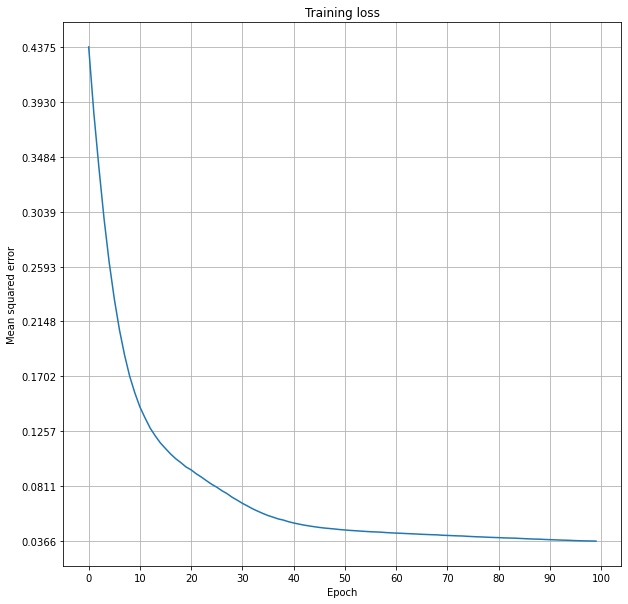

In [3]:
# Plot training loss values
sin_loss = sin_history.history['loss']
plt.figure(figsize=[10, 10])
plt.plot(np.arange(0, sin_epochs), sin_loss)
plt.grid()
axes = plt.gca()
axes.set(title='Training loss', 
         xlabel='Epoch', xticks=np.arange(0, sin_epochs+1, 10), 
         ylabel='Mean squared error', yticks=np.linspace(np.min(sin_loss), np.max(sin_loss), 10))
plt.show()

The final ouput after training can be visualized by plotting results from another test set.

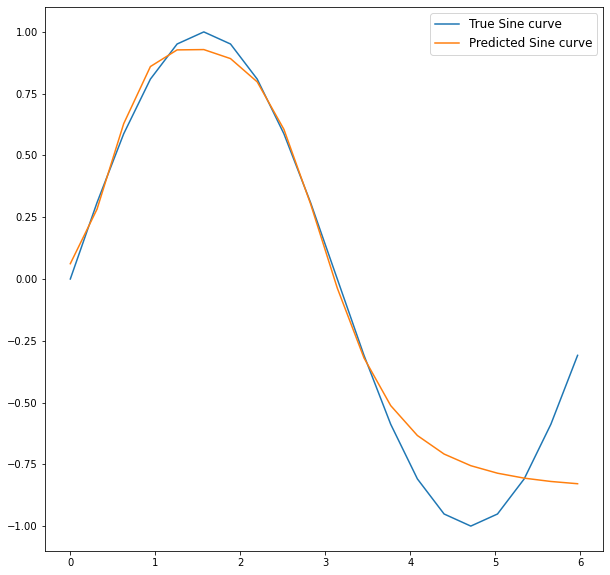

In [4]:
# Get the sample range [0, 2*pi] and the corresponding function output
x_sin_test = 2*np.pi*np.arange(0,1,0.05)
y_sin_test = np.sin(x_sin_test)

# Evaluate the trained model
y_sin_pred = model_sin.predict(x_sin_test)
plt.figure(figsize=[10,10])
plt.plot(x_sin_test, y_sin_test)
plt.plot(x_sin_test, y_sin_pred)
plt.legend(['True Sine curve', 'Predicted Sine curve'], fontsize='large')
plt.show()

When dealing with images such a fully-connected approach might not be suitable anymore. Images do have the property, that neighbouring pixels or even whole regions are mutually dependend and therefore often show redundant information. Thus, the fully-connected approach would also encode a high amount of unnessecary redundancy. To overcome this problem, fully-connected layers are often partly or even completely replaced by their convolution-based counterparts. Those convolution layers use kernels, similar to the filter approaches we used in the last exercise to process a whole image and to extract region-based features. This greatly decreases the number of parameters and furthermore makes use of spatial relationships in images.

<img src='question_sign.png' width=20px height=20px style="float:left;"> Consider the following convolutional layer of a neural network, with $3\times 3$ kernel sizes, $3$ input channels and $5$ output channels and each layer (input and output) has a spatial size of $32\times 32$. Compute the total number of trainable parameters.<br>

<img src='conv_layer.png' width=464px height=326px style="float:left;"><br>

> 

<img src='question_sign.png' width=20px height=20px style="float:left;"> For the same input and output specifications, how many parameters would have to be trained when using a fully-connected layer instead of a convolutional layer?<br>

> 

<img src='question_sign.png' width=20px height=20px style="float:left;"> We assumed, that the ouput after the convolution does also have a spatial size of $32\times 32$. But depending on the configuration, the spatial size can be reduced to $31\times 31$. Why does this happen?<br>

> 

With this reduction of parameters, we can try to process whole images. We will start with considering handwritten digits from a data set called *MNIST*.

In [5]:
# Load the MNIST data set
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

<img src='question_sign.png' width=20px height=20px style="float:left;"> Why do we need a seperate training and test set? Why can't we use the whole data set for training and evaluate performance on the training set?<br>

> 

<img src='question_sign.png' width=20px height=20px style="float:left;"> Briefly describe the term *overfitting*. How can you detect *overfitting* during training?<br>

> 

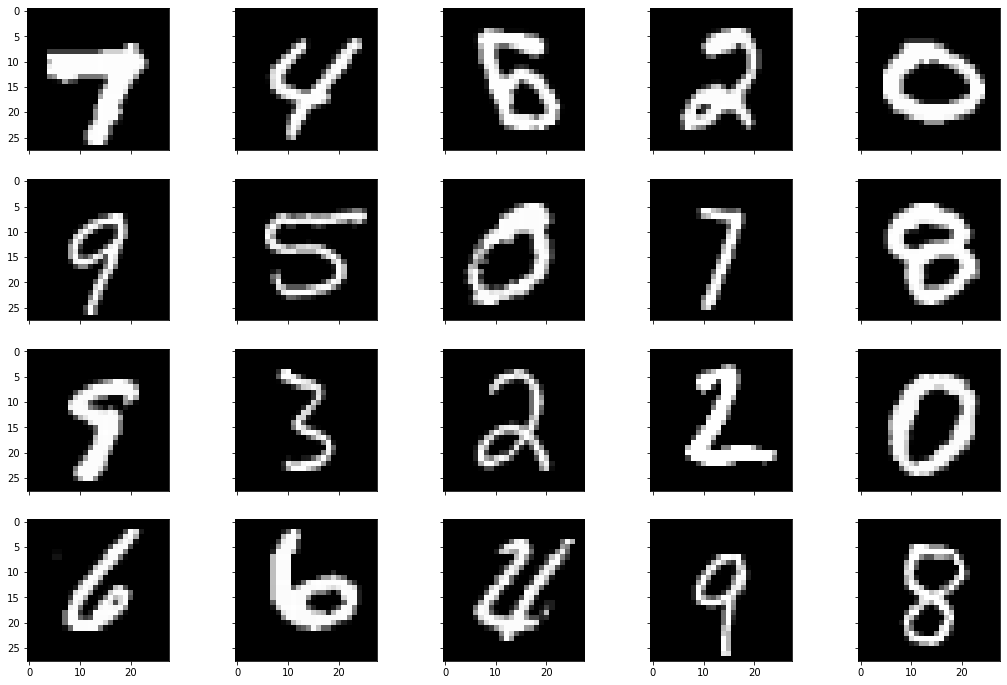

In [6]:
# Showcase of the data set
num_train_samples = len(x_train)
num_samples = 20
fig, axes = plt.subplots(4, 5, figsize=[18, 12], sharex=True, sharey=True)
ax = axes.flat
img_idx = np.random.choice(np.arange(num_train_samples), num_samples, replace=False)
plt.gray()
for i in np.arange(num_samples):
    ax[i].imshow(x_train[img_idx[i]])
plt.show()

Common classification networks consecutively lower the spatial resolution and change the number of feature channels until at the end only one classification vector is obtained. To reduce the spatial size pooling operators are used.

<img src='question_sign.png' width=20px height=20px style="float:left;"> What can alternatively be used instead of pooling to get a downsampling effect?<br>

> 

In order to use the data for training, we first have to preprocess the data. Since the provided data set was already normalized to the range $[0,255]$, we only apply max-normalization to be in range $[0,1]$. Also, since the `tensorflow` framework requires the data to be in order $[samples,x,y,channels]$, we need to reshape each data array. The labels are given as values in range $[0,9]$ indicating the corresponding digit being presented in the image. For training we transform the label data to be represented in one-hot encoding.

<img src='question_sign.png' width=20px height=20px style="float:left;"> What does *one-hot* encoding mean?

> 

In [7]:
# Data preprocessing

# Input image dimensions
img_rows, img_cols, num_channels = 28, 28, 1

# Normalization
x_train = x_train.astype('float')/255
x_train = x_train.reshape([-1, img_rows, img_cols, num_channels])

x_test = x_test.astype('float')/255
x_test = x_test.reshape([-1, img_rows, img_cols, num_channels])

# Convert class labels to one-hot encoded vectors
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

This time we set up the network using the functional API of `tensorflow`, which is another, more dynamic way of defining neural network architecture, allowing to also define non-sequential architectures.

In [8]:
# Reset the current Keras graph
tf.keras.backend.clear_session()

# Hyperparameters
batch_size = 50
CNN_epochs = 5

# Define the convolutional network
CNN_inputs = Input(shape=(img_rows, img_cols, num_channels))

conv_1 = Conv2D(filters=6, kernel_size=(5, 5), padding='same', activation='relu')(CNN_inputs)
maxpool_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv_1)

conv_2 = Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu')(maxpool_1)
maxpool_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv_2)

conv_output = Flatten()(maxpool_2)

dense_1 = Dense(units=120, activation='relu')(conv_output)
dense_2 = Dense(units=84, activation='relu')(dense_1)
CNN_predictions = Dense(units=10, activation='softmax')(dense_2)

# Instantiate the model
CNN = tf.keras.Model(inputs=CNN_inputs, outputs=CNN_predictions)

# Define optimizor and loss
CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the network
CNN_history = CNN.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=CNN_epochs,
                      validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 10s 204us/sample - loss: 0.2256 - accuracy: 0.9329 - val_loss: 0.0732 - val_accuracy: 0.9774
Epoch 2/5
48000/48000 [==============================] - 9s 194us/sample - loss: 0.0680 - accuracy: 0.9790 - val_loss: 0.0580 - val_accuracy: 0.9831
Epoch 3/5
48000/48000 [==============================] - 9s 190us/sample - loss: 0.0479 - accuracy: 0.9848 - val_loss: 0.0558 - val_accuracy: 0.9833
Epoch 4/5
48000/48000 [==============================] - 9s 191us/sample - loss: 0.0344 - accuracy: 0.9886 - val_loss: 0.0436 - val_accuracy: 0.9878
Epoch 5/5
48000/48000 [==============================] - 9s 190us/sample - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0442 - val_accuracy: 0.9872


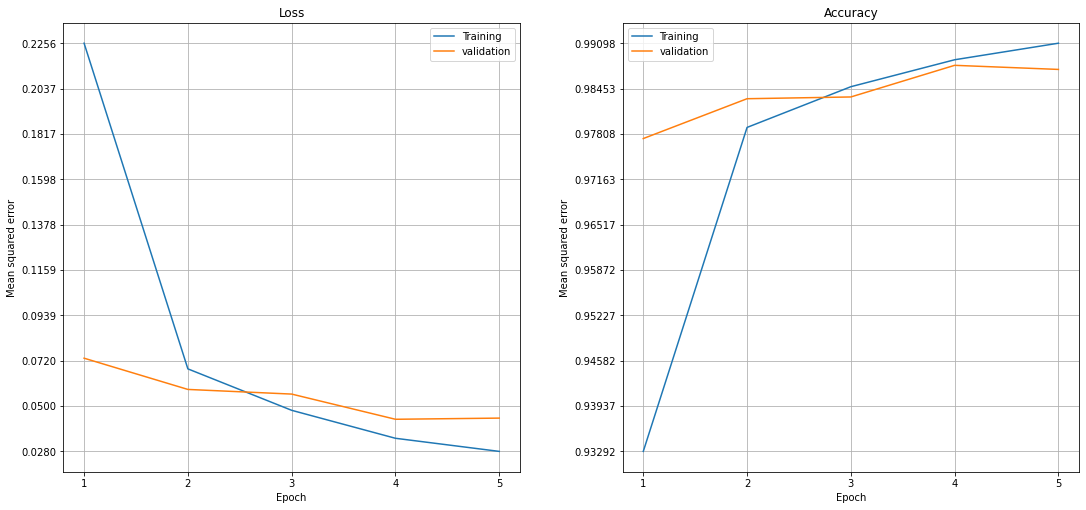

In [9]:
# Plot training & validation loss values
CNN_loss = CNN_history.history['loss']
CNN_val_loss = CNN_history.history['val_loss']
CNN_accuracy = CNN_history.history['accuracy']
CNN_val_accuracy = CNN_history.history['val_accuracy']
fig, axes = plt.subplots(1, 2, figsize=[16, 8])
ax = axes.flat
ax[0].plot(np.arange(1, CNN_epochs+1), CNN_loss)
ax[0].plot(np.arange(1, CNN_epochs+1), CNN_val_loss)
ax[0].grid()
ax[0].set(title='Loss', xlabel='Epoch', xticks=np.arange(1, CNN_epochs+1), ylabel='Mean squared error',
          yticks=np.linspace(np.min(CNN_loss), np.max(CNN_loss), 10))
ax[0].legend(['Training', 'validation'])

ax[1].plot(np.arange(1, CNN_epochs+1), CNN_accuracy)
ax[1].plot(np.arange(1, CNN_epochs+1), CNN_val_accuracy)
ax[1].grid()
ax[1].set(title='Accuracy', xlabel='Epoch', xticks=np.arange(1, CNN_epochs+1), ylabel='Mean squared error',
          yticks=np.linspace(np.min(CNN_accuracy), np.max(CNN_accuracy), 10))
ax[1].legend(['Training', 'validation'])

plt.tight_layout(pad=4)
plt.show()

In [10]:
# Evaluate accuracy on test set
loss_mnist, acc_mnist = CNN.evaluate(x_test, y_test, verbose=0)
print('Accuracy on the test set: {:.2f}%'.format(acc_mnist*100))

Accuracy on the test set: 98.72%


To visually inspect the results we can plot a random subset of predictions (Predicted=P and True=T).

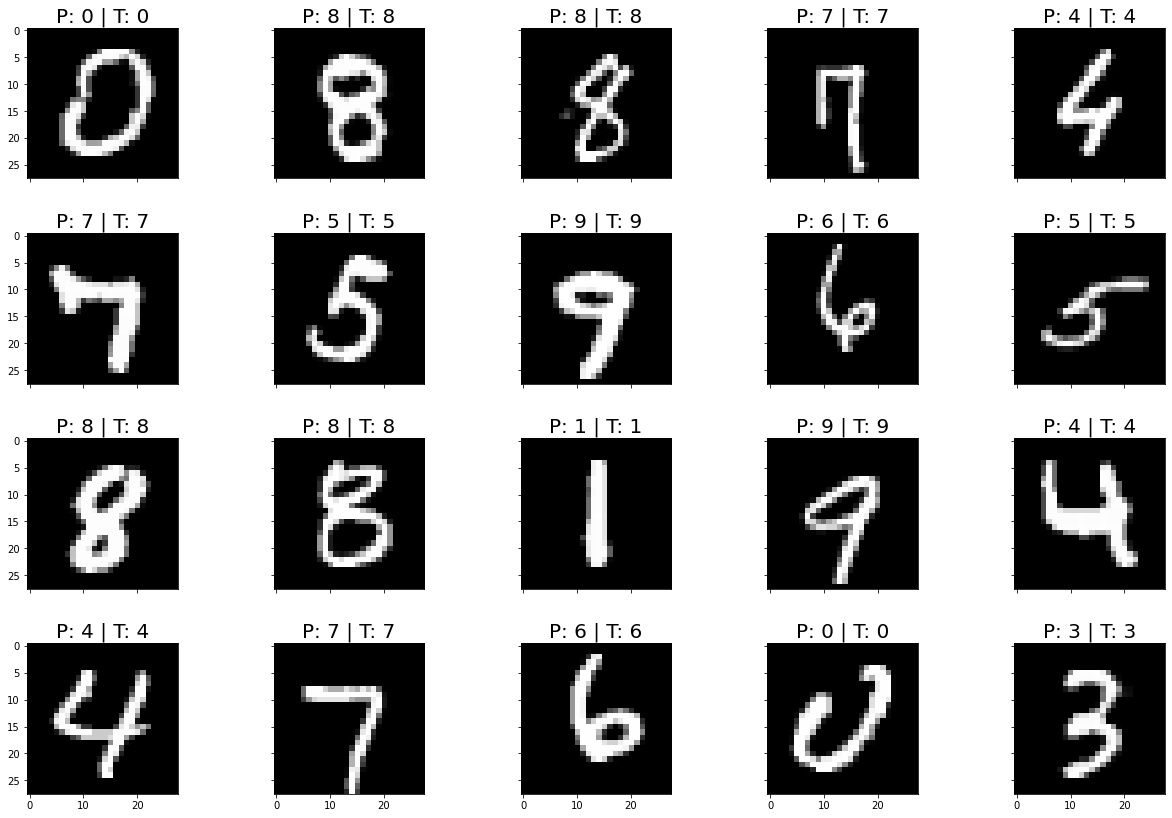

In [11]:
# Get the corresponding digit labels
pred_labels = CNN.predict(x_test)
pred_labels = np.argmax(pred_labels, axis=1)
test_labels = np.argmax(y_test, axis=1)

# Plot a set of predictions
fig, axes = plt.subplots(4, 5, figsize=[18, 12], sharex=True, sharey=True)
ax = axes.flat
plt.gray()
for num_pred, pred_idx in enumerate(np.random.randint(0, len(test_labels), 20)):
    ax[num_pred].imshow(x_test[pred_idx, :].reshape([img_rows, img_cols]))
    ax[num_pred].set_title('P: '+str(pred_labels[pred_idx])+' | T: '+str(test_labels[pred_idx]), fontsize=20)
plt.tight_layout(pad=3)
plt.show()

To further get an insight about the flaws of the trained model, we can inspect a random subset of erroneous predictions (Predicted=P and True=T).

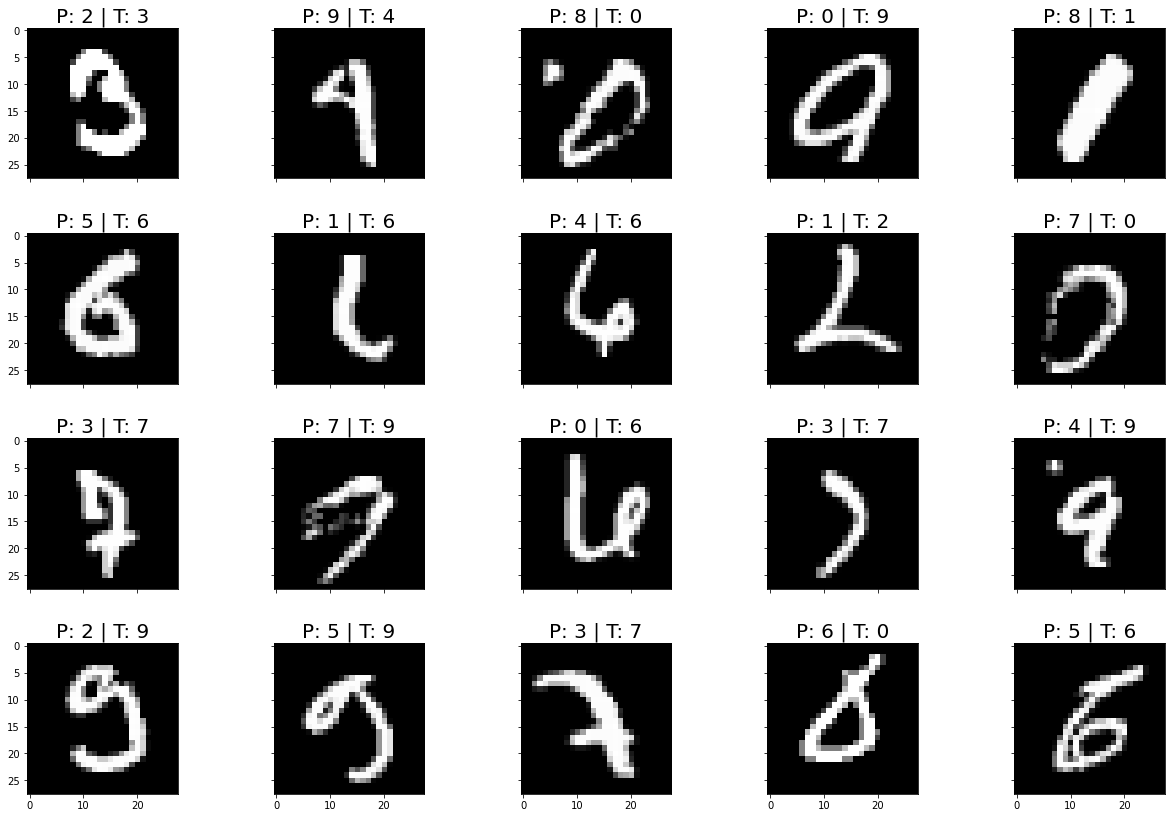

In [12]:
# The indices for erroneous predictions
err_idx = np.argwhere(pred_labels!=test_labels)[:, 0]

# Plot a set of false predictions
fig, axes = plt.subplots(4, 5, figsize=[18, 12], sharex=True, sharey=True)
ax = axes.flat
plt.gray()
for num_pred, pred_idx in enumerate(np.random.choice(err_idx, 20, replace=False)):
    ax[num_pred].imshow(x_test[pred_idx,:].reshape([img_rows, img_cols]))
    ax[num_pred].set_title('P: '+str(pred_labels[pred_idx])+' | T: '+str(test_labels[pred_idx]), fontsize=20)
plt.tight_layout(pad=3)    
plt.show()

Initially we claimed, that it would be benefitial for the network to learn specific region-based image features. From the resulting feature maps again features are extracted by another convolutional layer, in order to build even more discriminative features. But does the network even learn features, we thought would be extracted, like edges and textures?

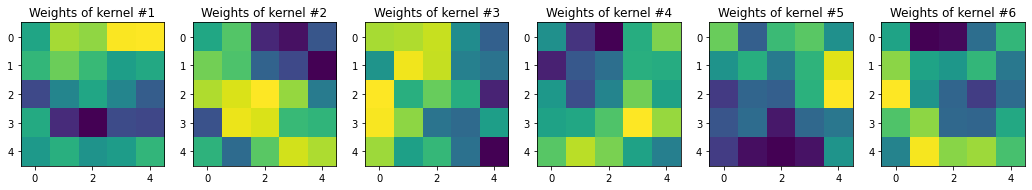

In [13]:
# Visualize kernel weights of the first convolutional layers
conv1_kernels = CNN.layers[1].get_weights()[0]  
num_conv1_kernels = conv1_kernels.shape[-1]
fig, axes = plt.subplots(1, num_conv1_kernels, figsize=[18, 12])
ax = axes.flat
for i in np.arange(num_conv1_kernels):
    ax[i].imshow(conv1_kernels[:, :, 0, i], cmap='viridis')
    ax[i].set_title('Weights of kernel #'+str(i+1))
plt.show()

In an abstract way, this looks like what we expected, as this is could be interpreted to be similar to edge detection and texture filters. Now we can also have a look how this affects the image, if its passed through the first convolutional layers.

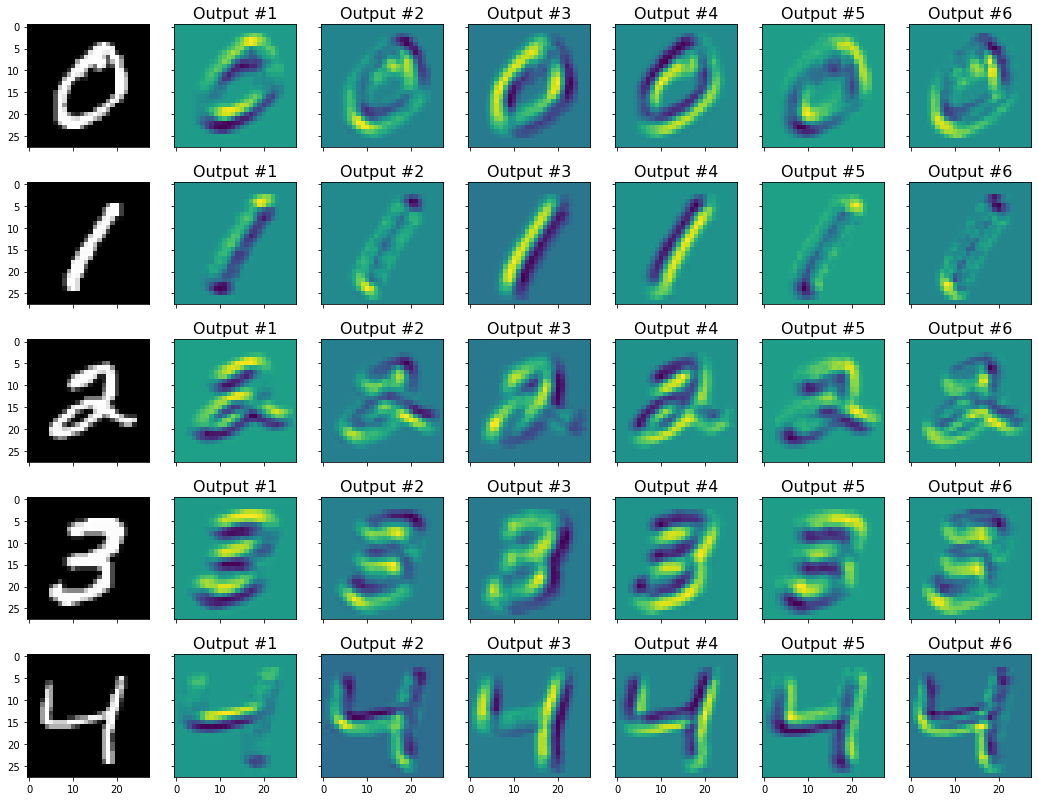

In [14]:
# Load the images and apply the convolutional kernel
fig, axes = plt.subplots(5, num_conv1_kernels+1, figsize=[18, 14], sharex=True, sharey=True)
ax = axes.flat
for i in np.arange(5):
    
    # Get the first image of the corresponding digit
    img_idx = np.squeeze(np.argwhere(np.argmax(y_train, axis=1)==i))[0]
    img = np.squeeze(x_train[img_idx])
    ax[(num_conv1_kernels+1)*i].imshow(img, cmap='gray')
    for j in np.arange(num_conv1_kernels):
        img_filtered = convolve(img, conv1_kernels[:, :, 0, j], mode='reflect')
        ax[(num_conv1_kernels+1)*i+j+1].imshow(img_filtered, cmap='viridis')
        ax[(num_conv1_kernels+1)*i+j+1].set_title('Output #'+str(j+1), fontsize=16)
plt.show()